In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd

In [19]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [21]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [22]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [23]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

4-16           0.00
 2017-04-17           0.30
 2017-04-17           1.30
 2017-04-17           0.41
 2017-04-17            NaN
 2017-04-17           0.02
 2017-04-17            NaN
 2017-04-17           1.04
 2017-04-18           0.98
 2017-04-18           0.15
 2017-04-18           0.12
 2017-04-18           0.00
 2017-04-18           0.08
 2017-04-18           0.00
 2017-04-18           2.03
 2017-04-19           0.02
 2017-04-19           0.02
 2017-04-19            NaN
 2017-04-19           0.02
 2017-04-19           0.14
 2017-04-19           0.00
 2017-04-19           0.00
 2017-04-20           0.05
 2017-04-20           0.00
 2017-04-20           0.00
 2017-04-20           0.35
 2017-04-20           0.33
 2017-04-20            NaN
 2017-04-20           0.05
 2017-04-21           1.84
 2017-04-21           1.74
 2017-04-21           0.23
 2017-04-21           2.36
 2017-04-21            NaN
 2017-04-21           1.16
 2017-04-21           1.05
 2017-04-22           1.01
 2017-04

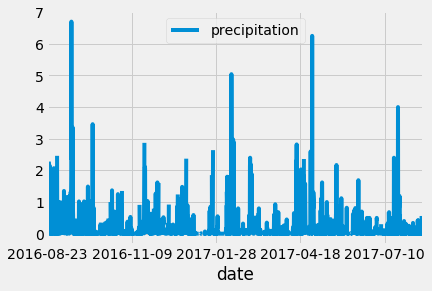

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

# Sort the dataframe by date
print(df.to_string(index=False))
df = df.sort_index()
print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()


In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [38]:
# How many stations are available in this dataset?


AttributeError: type object 'station' has no attribute 'describe'

In [29]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [32]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge